In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# File path of adzuna_scrapped_data.csv
file_path = '../../data/scraped_data/adjurna/csv/adzuna_scrapped_data.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [6]:
df.head()

,company,title,location,link,job_posted,category,source,description
0,Süddeutsche Zeitung Digitale Medien GmbH,Werkstudent (m/w/d) Data Science,"München, München (Kreis)",https://www.adzuna.de/land/ad/4559596995?se=AC...,2024-02-06 13:44:59+00:00,Aufgaben Profil Wir bieten Die Süddeutsche Zei...,Sonstige/Allgemeine Stellen,Adzuna
1,Technische Universität München,Professor in Empirical Economics and Data Science,"Altstadt-Lehel, München",https://www.adzuna.de/land/ad/4570297796?se=AC...,2024-02-15 17:42:47+00:00,The Technical University of Munich (TUM) invit...,Unknown,Adzuna
2,O2 Telefónica,Duales Studium Data Science und Scientific Com...,"München, München (Kreis)",https://www.adzuna.de/land/ad/4570047587?se=AC...,2024-02-15 13:34:32+00:00,"Vertragsart: Vollzeit, befristet Standort: Tel...",Unknown,Adzuna
3,Hoffmann Group,Data Science Product Manager (m/f/d),"München, München (Kreis)",https://www.adzuna.de/land/ad/4546865990?se=AC...,2024-01-27 13:21:18+00:00,"More than 4,000 highly motivated employees in ...",Stellen aus Wissenschaft & Qualitätssicherung,Adzuna
4,ProSiebenSat.1 Careers,Intern Data Science & AI (m/f/d),"München, München (Kreis)",https://www.adzuna.de/land/ad/4548461379?se=AC...,2024-01-29 13:19:48+00:00,Let's CreateMomentsThatMatter together ProSieb...,Stellen aus Wissenschaft & Qualitätssicherung,Adzuna


In [8]:
# Select features and target
X = df['description']  # 'Description' column contains the lengthy text
y = df['category']  # Assuming 'Categories' column contains the predefined categories


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the classifiers
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Support Vector Machine (SVM)': SVC(),
    'Random Forest': RandomForestClassifier()
}

In [14]:
# Initializing lists to store classifier names and accuracies
classifier_names = []
accuracies = []

for clf_name, clf in classifiers.items():
    clf.fit(X_train_vectorized, y_train)
    y_pred = clf.predict(X_test_vectorized)

    # Calculateing the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    classifier_names.append(clf_name)
    accuracies.append(accuracy)
    
    print(f'{clf_name} Classification Report:')
    print(classification_report(y_test, y_pred, zero_division='warn'))
    print()  

Naive Bayes Classification Report:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      precision    recall  f1-score   support

 UPLIFTYOURFUTURE Wir sind über 11.000. An 18 Standorten weltweit. Jedes dritte Flugzeug fliegt mit unserer Technologie. Immer effizienter, leiser, nachhaltiger. Wir gestalten die Zukunft der Luftfahrt. Was wir noch brauchen? Sie. Unser Team in München sucht Sie:  Praktikant Data Science im Bereich Engine Health Monitoring (all genders) Die MTU hat ein System zur Zustandsüberwachung von Triebwerken (Engine Health Monit

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

Support Vector Machine (SVM) Classification Report:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      precision    recall  f1-score   support

 UPLIFTYOURFUTURE Wir sind über 11.000. An 18 Standorten weltweit. Jedes dritte Flugzeug fliegt mit unserer Technologie. Immer effizienter, leiser, nachhaltiger. Wir gestalten die Zukunft der Luftfahrt. Was wir noch brauchen? Sie. Unser Team in München sucht Sie:  Praktikant Data Science im Bereich Engine Health Monitoring (all genders) Die MTU hat ein System zur Zustandsüberwachung von Triebwerken (En

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

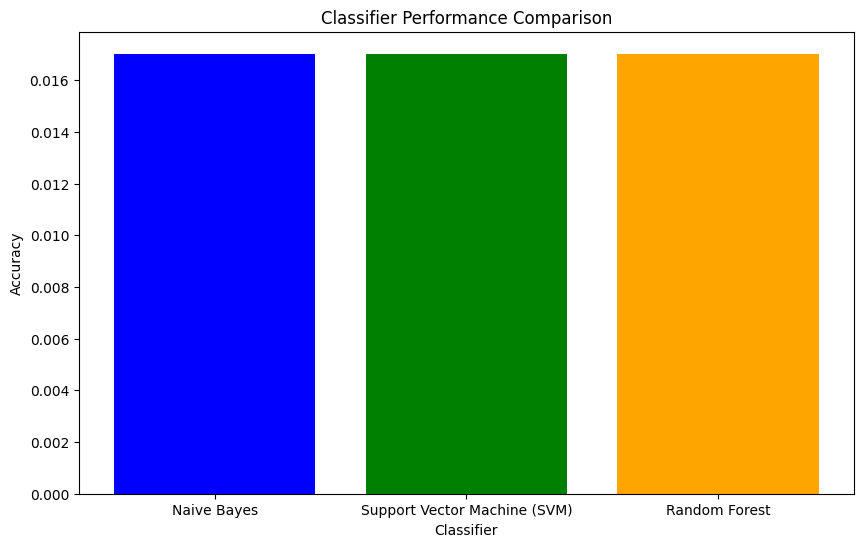

In [15]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Performance Comparison')
#plt.ylim(0, 1)  # y-axis limits

# Save the plot as an image file
plot_file_path = 'classifier_performance_comparison.png'  # Set the directory where you want to save the plot
plt.savefig(plot_file_path)

# Display the plot 
plt.show()